<a href="https://colab.research.google.com/github/Oumaima0418/CodSoft/blob/main/codsoft_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOVIE RATING PREDICTION WITH PYTHON**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## `Data Collecting`

In [2]:
#detecting the encoding of "IMDb Movies India.csv" and read it using the detected encoding.
import chardet

with open("/content/IMDb Movies India.csv", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

#print(f"Detected encoding: {encoding}")
df = pd.read_csv("/content/IMDb Movies India.csv",encoding=encoding)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [3]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [60]:
data=df.copy()

In [61]:
import re
#removing parentheses from column 'Year'
def remove_pt(x):
    if isinstance(x, str):
        num_str = re.sub(r'[()]', '', x)
        return num_str
    else:
        return x

# Apply the function to the 'Year' column
data['Year'] = data['Year'].apply(remove_pt)

In [62]:
# Define a function to extract the numeric part of the 'Votes' value
data['Votes'] = data['Votes'].str.replace(',', '')
def votes_numeric(x):
    if isinstance(x, str):
        # Remove the dollar sign and 'M'
        num_str = re.sub(r'[$M]', '', x)
        # Convert the remaining string to a float
        return float(num_str)
    else:
        return x

# Apply the function to the 'Votes' column
data['Votes'] = data['Votes'].apply(votes_numeric)

# Convert the 'Votes' column to numeric
data['Votes']=pd.to_numeric(data['Votes'])

In [63]:
# Define a function to extract the numeric part of the 'Duration' value
def duration(x):
    if isinstance(x, str):
        # Remove 'min'
        num_str = re.sub(r'[min]', '', x)
        return num_str
    else:
        return x

# Apply the function to the 'Duration' column
data['Duration'] = data['Duration'].apply(duration)

# Convert the 'Duration' column to numeric
data['Duration']=pd.to_numeric(data['Duration'])

In [64]:
data.dropna(inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115.0,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153.0,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [65]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [66]:
data.loc[data.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


## Visualisation

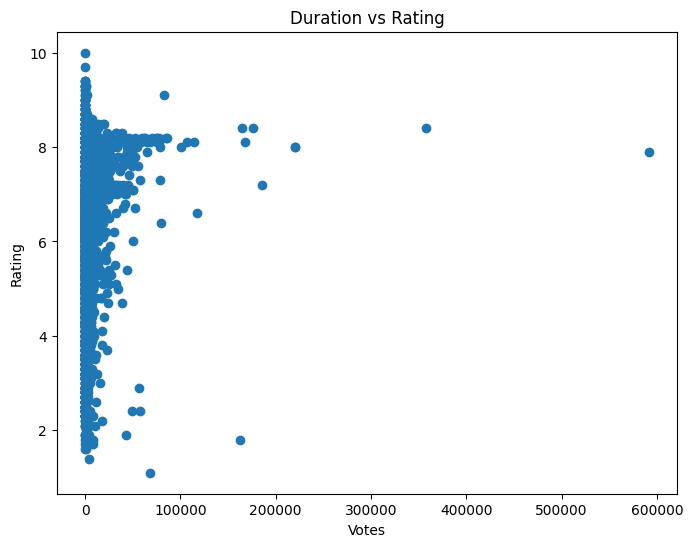

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(data['Votes'],data['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

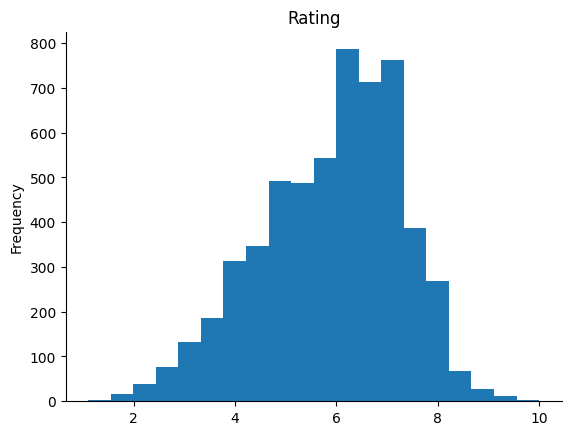

In [58]:
data['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Prediction model

In [67]:
#creating a new feature by grouping the columns to better predict the rating of a movie

mean_genre_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Mean_genre_rating'] = mean_genre_rating

mean_director_rating = data.groupby('Director')['Rating'].transform('mean')
data['Mean_director_rating'] = mean_director_rating

mean_actor1_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Mean_actor1_rating'] = mean_actor1_rating

mean_actor2_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Mean_actor2_rating'] = mean_actor2_rating

mean_actor3_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Mean_actor3_rating'] = mean_actor3_rating

In [69]:
# Encode categorical features
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create the feature matrix and target variable
X = data[['Duration','Mean_genre_rating','Votes','Mean_director_rating', 'Mean_actor1_rating', 'Mean_actor2_rating', 'Mean_actor3_rating']]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.42
R-squared: 0.77


In [72]:
#Interpret the model coefficients
feature_importances = pd.Series(model.coef_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

Mean_director_rating    0.414490
Mean_actor3_rating      0.330924
Mean_actor2_rating      0.288317
Mean_actor1_rating      0.199392
Mean_genre_rating       0.119468
Duration                0.002005
Votes                   0.000005
dtype: float64


The lower feature importance values for 'Duration' and 'Votes' shows that they are less important in predicting the movie's rating compared to the average ratings of the director and actors.